<a href="https://colab.research.google.com/github/Sahilzayn/Chennai_House_Prediction/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Chennai House Prediction:-** 

**Importing** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

**Importing** **Dataset**

In [2]:
from google.colab import drive
path='/content/drive/MyDrive/data_set/chennai.csv'
df=pd.read_csv(path)

In [3]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR),1+0.04,"POWER(Z,Y)",CURRENT YEAR
0,P09411,Anna Nagar,1986,19-12-06,2006,2.0,1.0,5,Ab Normal,No,...,2.5,3.765,760122,304049,21717770,40676975.91,16,1.04,1.872981,2022
1,P05346,Velachery,1855,13-03-10,2010,3.0,2.0,5,Family,No,...,3.6,4.010,356321,77042,9630290,15418404.56,12,1.04,1.601032,2022
2,P00219,Chrompet,1220,11-09-14,2014,2.0,1.0,4,Partial,No,...,3.1,3.320,409027,198316,12394750,16963071.24,8,1.04,1.368569,2022
3,P09105,Chrompet,1167,05-04-07,2007,1.0,1.0,3,Partial,No,...,2.5,2.670,263152,33955,8488790,15287831.22,15,1.04,1.800944,2022
4,P09679,Velachery,1847,13-03-06,2006,3.0,2.0,5,Family,No,...,2.1,3.260,604809,235204,16800250,31466553.17,16,1.04,1.872981,2022


In [4]:
df.columns  # Totall number of columns 

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'SALE_YEAR', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILD_YEAR', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'INF_PRICE',
       'NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR)', '1+0.04', 'POWER(Z,Y)',
       'CURRENT YEAR'],
      dtype='object')

In [5]:
df.shape  # This dataset contains 7109 rows and 23 coloumns 

(7109, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PRT_ID                                      7109 non-null   object 
 1   AREA                                        7109 non-null   object 
 2   INT_SQFT                                    7109 non-null   int64  
 3   DATE_SALE                                   7109 non-null   object 
 4   SALE_YEAR                                   7109 non-null   int64  
 5   N_BEDROOM                                   7108 non-null   float64
 6   N_BATHROOM                                  7104 non-null   float64
 7   N_ROOM                                      7109 non-null   int64  
 8   SALE_COND                                   7109 non-null   object 
 9   PARK_FACIL                                  7109 non-null   object 
 10  DATE_BUILD  

From df.info we observe that there are some categorical data which contains some missing values like N_BEDROOM ,N_BATHROOM and  QS_OVERALL  

In [7]:
df.describe()

,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,BUILD_YEAR,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR),1+0.04,"POWER(Z,Y)",CURRENT YEAR
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03,7.109000e+03,7109.000000,7.109000e+03,7109.000000,7109.0
mean,1382.073006,2009.768181,1.637029,1.213260,3.688704,1985.491912,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,1.767201e+07,12.231819,1.040000e+00,1.621739,2022.0
std,457.410902,2.205979,0.802902,0.409639,1.019099,12.648859,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06,6.310658e+06,2.205979,3.330903e-14,0.141455,0.0
min,500.000000,2004.000000,1.000000,1.000000,2.000000,1949.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.591355e+06,7.000000,1.040000e+00,1.315932,2022.0
25%,993.000000,2008.000000,1.000000,1.000000,3.000000,1976.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,1.323023e+07,11.000000,1.040000e+00,1.539454,2022.0
50%,1373.000000,2010.000000,1.000000,1.000000,4.000000,1986.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07,1.687515e+07,12.000000,1.040000e+00,1.601032,2022.0
75%,1744.000000,2011.000000,2.000000,1.000000,4.000000,1996.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07,2.098167e+07,14.000000,1.040000e+00,1.731676,2022.0
max,2500.000000,2015.000000,4.000000,2.000000,6.000000,2010.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,4.354230e+07,18.000000,1.040000e+00,2.025817,2022.0


In [8]:
df.drop(columns=['PRT_ID','COMMIS','REG_FEE'],inplace=True)  # Droping unwanted columns

#  Visualise all numeric data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc26204bd90>,
      dtype=object)

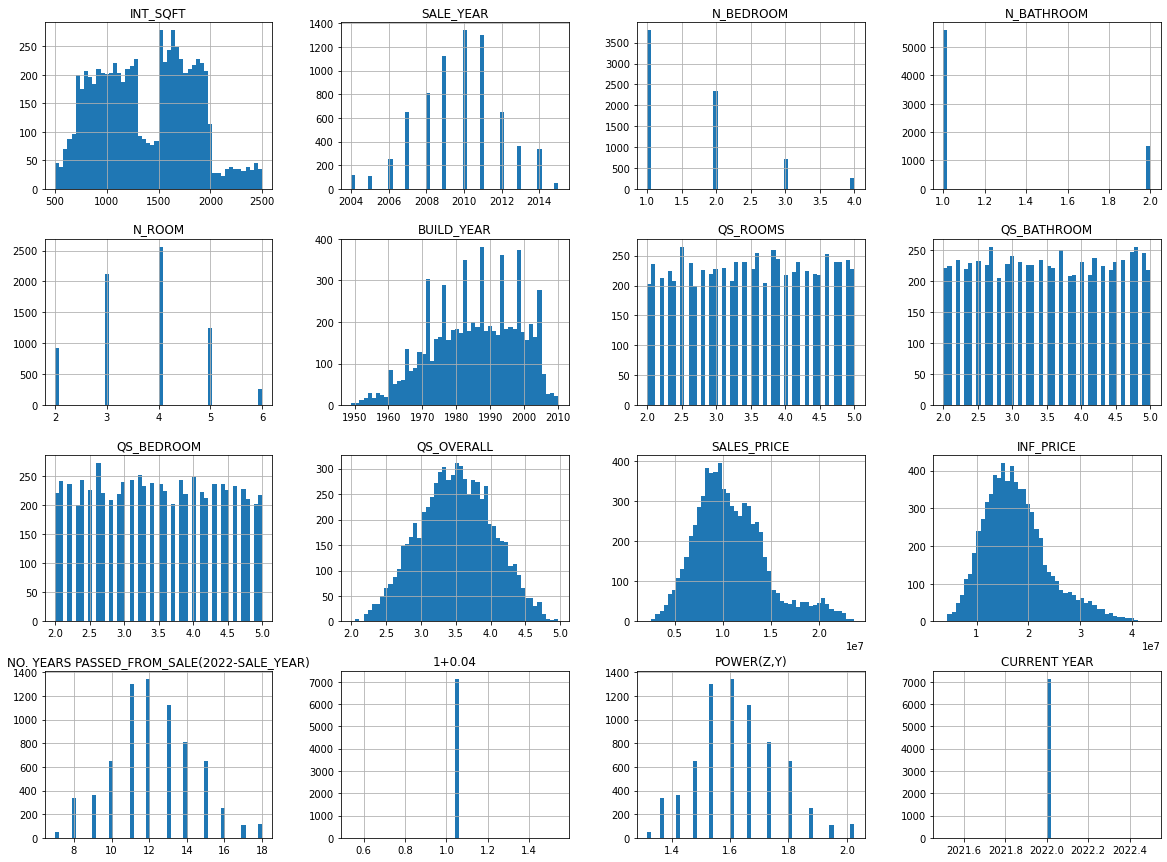

In [9]:
df.hist(bins =50, figsize=(20,15) )

## **Checking Sum of Null values or missing values**

In [10]:
df.isnull().sum()

AREA                                           0
INT_SQFT                                       0
DATE_SALE                                      0
SALE_YEAR                                      0
N_BEDROOM                                      1
N_BATHROOM                                     5
N_ROOM                                         0
SALE_COND                                      0
PARK_FACIL                                     0
DATE_BUILD                                     0
BUILD_YEAR                                     0
BUILDTYPE                                      0
UTILITY_AVAIL                                  0
STREET                                         0
MZZONE                                         0
QS_ROOMS                                       0
QS_BATHROOM                                    0
QS_BEDROOM                                     0
QS_OVERALL                                    48
SALES_PRICE                                    0
INF_PRICE           

from this we observe **N_BEDROOM** have **1** missing values,**N_BATHROOM** have **5** and **QS_OVERALL** have **48**.

N_BEDROOM

In [11]:
df.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

HERE, WE OBSERVE THAT NUMBER OF 1 ROOMS OCCURS MOST AND HERE THERE IS ONLY ONE MISSING VALUES SO WE CANT FILL WITH MODE 


In [12]:
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])

In [13]:
df.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

N_BATHROOM

In [14]:
df.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [15]:
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

In [16]:
df.N_BATHROOM.value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

QS_OVERALL

In [17]:
df.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
4.810     1
2.465     1
2.335     1
4.765     1
3.245     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [18]:
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean()) # AS MEAN VALUE IF THIS 

In [19]:
df.isnull().sum()   # Cross checking null values

AREA                                          0
INT_SQFT                                      0
DATE_SALE                                     0
SALE_YEAR                                     0
N_BEDROOM                                     0
N_BATHROOM                                    0
N_ROOM                                        0
SALE_COND                                     0
PARK_FACIL                                    0
DATE_BUILD                                    0
BUILD_YEAR                                    0
BUILDTYPE                                     0
UTILITY_AVAIL                                 0
STREET                                        0
MZZONE                                        0
QS_ROOMS                                      0
QS_BATHROOM                                   0
QS_BEDROOM                                    0
QS_OVERALL                                    0
SALES_PRICE                                   0
INF_PRICE                               

### **DATA CLEANING**

# **Area**

In [20]:
df.AREA.unique()

array(['Anna Nagar', 'Velachery', 'Chrompet', 'KK Nagar', 'T Nagar',
       'Adyar', 'Karapakkam'], dtype=object)

In [21]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

**RECTIFYING** **SPELLING** **MISTAKES**

**Chromepet**

In [22]:
df['AREA']= df['AREA'].str.replace("Chrompet", "Chromepet", case = False)

In [23]:
df['AREA']= df['AREA'].str.replace("Chrompt", "Chromepet", case = False)

In [24]:
df['AREA']= df['AREA'].str.replace("Chrmpet", "Chromepet", case = False)

In [25]:
df['AREA']= df['AREA'].str.replace("Chormpet", "Chromepet", case = False)

**Karapakkam**  

In [26]:
df['AREA']= df['AREA'].str.replace("Karapakam", "Karapakkam", case = False)

**KK** **Nagar**

In [27]:
df['AREA']= df['AREA'].str.replace("KKNagar", "KK Nagar", case = False)

**Anna Nagar**

In [28]:
df['AREA']= df['AREA'].str.replace("Ana Nagar", "Anna Nagar", case = False)

In [29]:
df['AREA']= df['AREA'].str.replace("Ann Nagar", "Anna Nagar", case = False)

**Velachery**

In [30]:
df['AREA']= df['AREA'].str.replace("Velchery", "Velachery", case = False)

**Adyar** 

In [31]:
df['AREA']= df['AREA'].str.replace("Adyr", "Adyar", case = False)

**T** **Nagar**

In [32]:
df['AREA']= df['AREA'].str.replace("TNagar", "T Nagar", case = False)

In [33]:
df.AREA.value_counts()   # cross checking the spellings

Chromepet     1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

### **INT_SQFT**

In [34]:
df.INT_SQFT.value_counts()

1781    18
1538    15
1514    13
1505    13
961     12
        ..
1753     1
1342     1
2360     1
2342     1
1557     1
Name: INT_SQFT, Length: 1699, dtype: int64

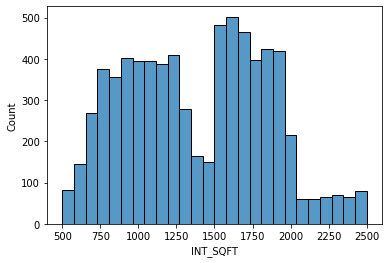

In [35]:
sns.histplot(data=df, x="INT_SQFT")

# **SALE_COND**

In [36]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

Here,we found that there are some spelling mistakes in this and we have to correct it 

In [37]:
df['SALE_COND']= df['SALE_COND'].str.replace("Adj Land", "AdjLand", case = False)

In [38]:
df['SALE_COND']= df['SALE_COND'].str.replace("AdjLand ", "Adjland", case = False)

In [39]:
df['SALE_COND']= df['SALE_COND'].str.replace("Partiall", "Partial", case = False)

In [40]:
df['SALE_COND']= df['SALE_COND'].str.replace("PartiaLl", "Partial", case = False)

In [41]:
df['SALE_COND']= df['SALE_COND'].str.replace("AbNormal", "Abnormal", case = False)

In [42]:
df['SALE_COND']= df['SALE_COND'].str.replace("Ab Normal", "Abnormal", case = False)

In [43]:
df.SALE_COND.value_counts() # Crosschecking the results

AdjLand        1439
Partial        1433
Normal Sale    1423
Abnormal       1411
Family         1403
Name: SALE_COND, dtype: int64

### **PARK_FACIL**

In [44]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

Here,we found that there is a spelling mistakes in this and we have to correct it

In [45]:
df['PARK_FACIL']= df['PARK_FACIL'].str.replace("Noo", "No", case = False)

In [46]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

 Crosschecking the results

### **BUILDTYPE**

In [47]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

Here,we found that there are some spelling mistakes in this and we have to correct it

In [48]:
df['BUILDTYPE']= df['BUILDTYPE'].str.replace("Comercial", "Commercial", case = False)

In [49]:
df['BUILDTYPE']= df['BUILDTYPE'].str.replace("Other", "Others", case = False)

In [50]:
df['BUILDTYPE']= df['BUILDTYPE'].str.replace("Otherss", "Others", case = False)

In [51]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

### **UTILITY_AVAIL**

In [52]:
df.UTILITY_AVAIL.value_counts()

NoSewer     3700
AllPub      1887
ELO         1522
Name: UTILITY_AVAIL, dtype: int64

Here,we found that there are some spelling mistakes in this and we have to correct it

In [53]:
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].str.replace("All Pub", "AllPub", case = False)

In [54]:
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].str.replace("NoSewr", "Nosewa", case = False)

In [55]:
mapper = {"Nosewa":"NoSeWa"}
for k , v in mapper.items():
  df.loc[df['UTILITY_AVAIL'].str.contains(k),'UTILITY_AVAIL'] = v

In [56]:
df.UTILITY_AVAIL.value_counts()

NoSewer     3700
AllPub      1887
ELO         1522
Name: UTILITY_AVAIL, dtype: int64

### **STREET**

In [57]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [58]:
mapper = {"Pavd":"Paved","NoAccess":"No Access"}
for k , v in mapper.items():
  df.loc[df['STREET'].str.contains(k),'STREET'] = v

In [59]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

### CREATING NEW FEATURES FOR DATE_SALE & DATE_BUILD.

In [60]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
pd.DataFrame(df.dtypes.value_counts()).T

,float64,object,int64,datetime64[ns]
0,9,7,7,2


In [61]:
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year

In [62]:
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']

### DROPPING THE FEATURES WHICH MAKE NO SENSE.

*Droping ['DATE_SALE','DATE_BUILD'] because we have retrieved the years from those both the features. Droping['PRT_ID'] because we dont need this feature for modeling. Droping ['QS_ROOMS','QS_OVERALL','QS_BATHROOM','MZZONE','QS_BEDROOM'] because they are proprietary(masked) features. Last but not the least, they have less relation with the target* 

In [63]:
df.drop(['DATE_SALE','DATE_BUILD','NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR)','1+0.04','POWER(Z,Y)','CURRENT YEAR'],axis=1,inplace=True)



## APPLIED INFLATION TO 4% FOR MY TARGET VARIABLE.

BEFORE INFLATION AND AFTER INFLATION.


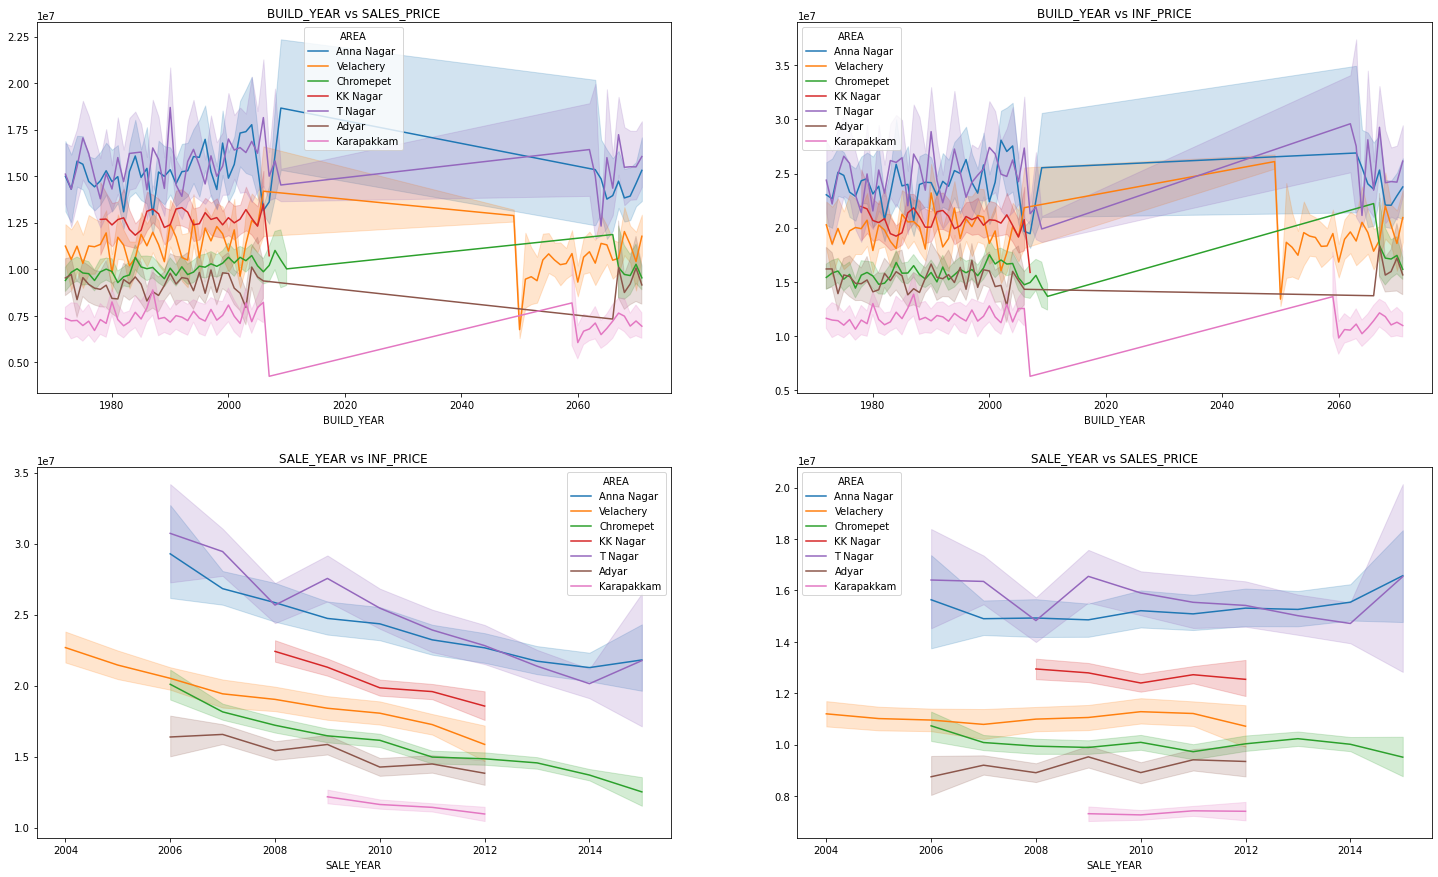

In [64]:
plt.figure(figsize=(25,15))
print('BEFORE INFLATION AND AFTER INFLATION.')
plt.subplot(221)
sns.lineplot(x = "BUILD_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.title('BUILD_YEAR vs SALES_PRICE')
plt.subplot(222)
sns.lineplot(x = "BUILD_YEAR", y = df["INF_PRICE"].values, data = df,hue='AREA')
plt.title('BUILD_YEAR vs INF_PRICE')
plt.subplot(223)
sns.lineplot(x = "SALE_YEAR", y = df["INF_PRICE"].values, data = df,hue='AREA')
plt.title('SALE_YEAR vs INF_PRICE')
plt.subplot(224)
sns.lineplot(x = "SALE_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

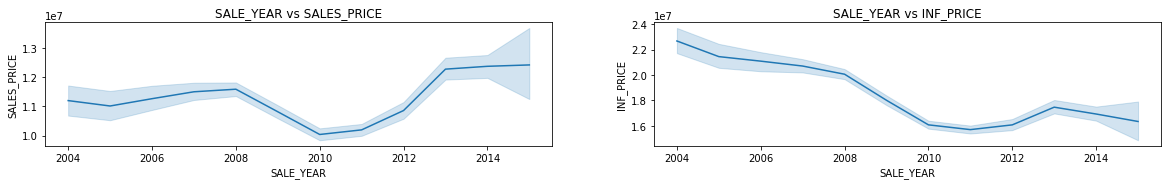

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(221)
sns.lineplot(x = "SALE_YEAR", y = df["SALES_PRICE"], data = df)
plt.title('SALE_YEAR vs SALES_PRICE')
plt.subplot(222)
sns.lineplot(x = "SALE_YEAR", y = df["INF_PRICE"], data = df)
plt.title('SALE_YEAR vs INF_PRICE')
plt.show()



1. Graph "SALE_YEAR vs SALES_PRICE" in general we see that the price has been increased.But decreased in 2004-2005(Tsunami : "https://en.wikipedia.org/wiki/2004_Indian_Ocean_Tsunami" and decreased in 2008-2010).
2.   Graph "SALE_YEAR vs INF_PRICE" in general we see that the price has been decreased. But increased slightly on 2012-2013. 



## **DATA VISUALISATION.**

In [66]:
A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

### **DISTRIBUTION OF THE DATA.**

 * BUILDTYPE - Number of "House" building type is higher than "Commercial" and
"Other" building type.

 * AREA - Number of building in "Chrompet" is higher than other area's. "T Nagar" has low number of building when compared with other area's. 

 * UTILITY_AVAILABLE - "NoSewer" building is higher than "ALLPUB" and "ELO" building.

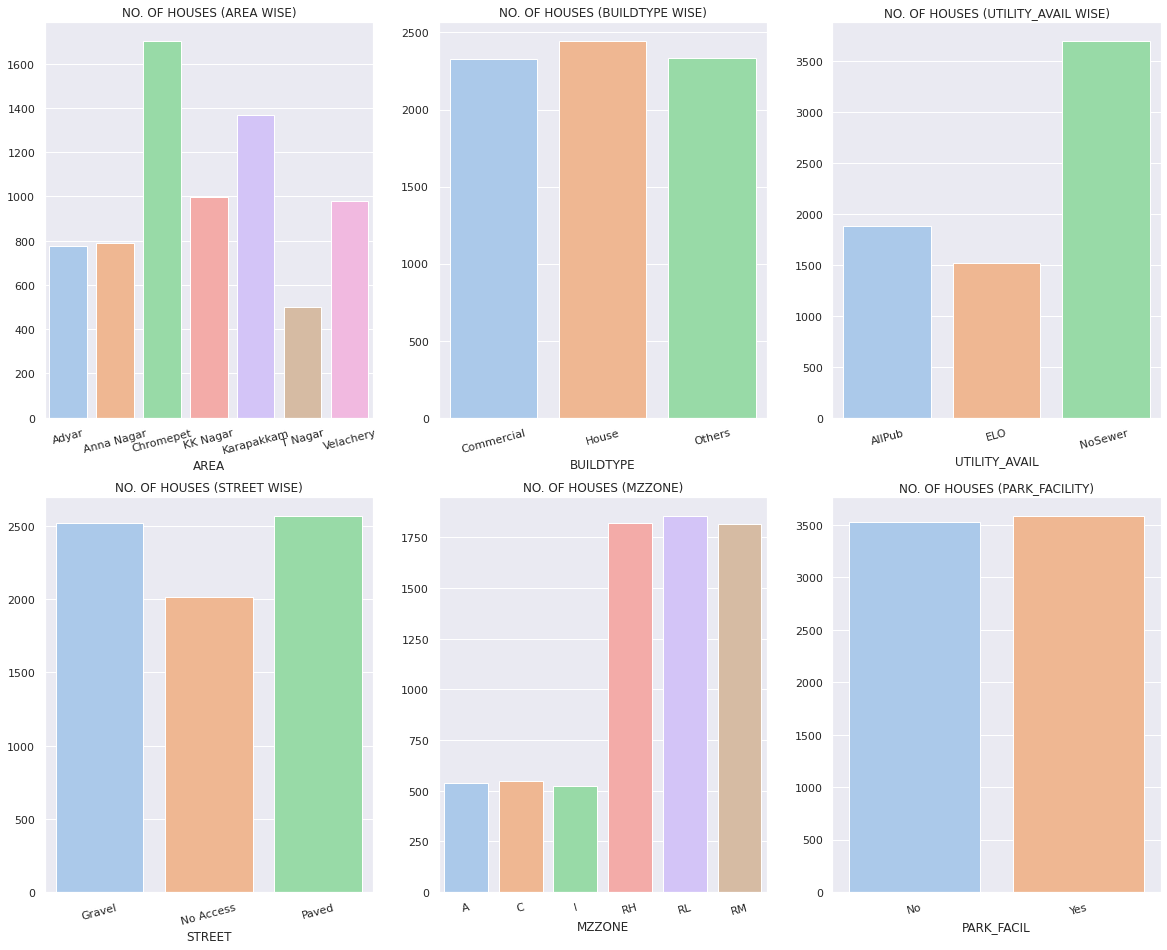

In [67]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

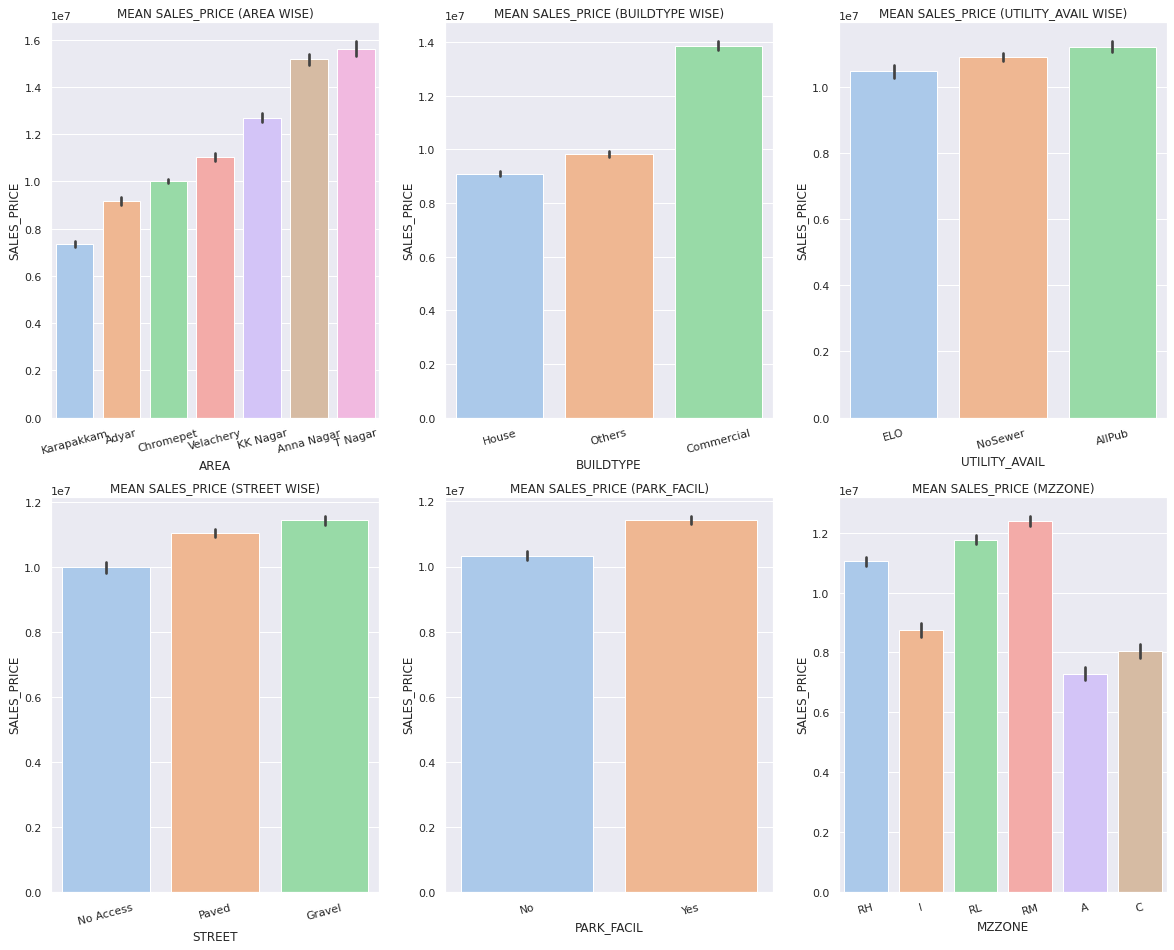

In [68]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (AREA WISE)')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET WISE)')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL)')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE)')
plt.show()

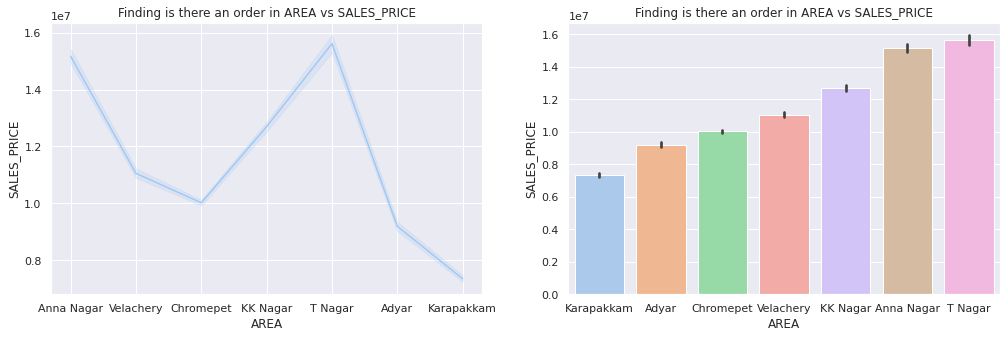

In [69]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['AREA'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

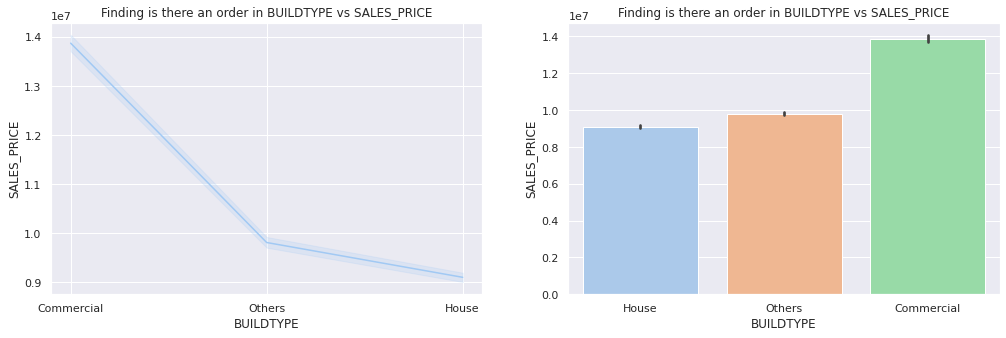

In [70]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

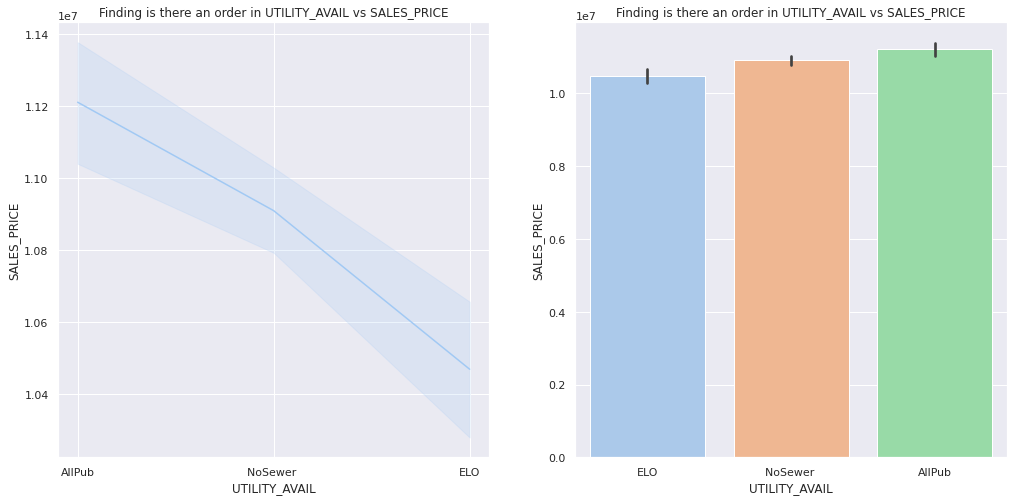

In [71]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.show()

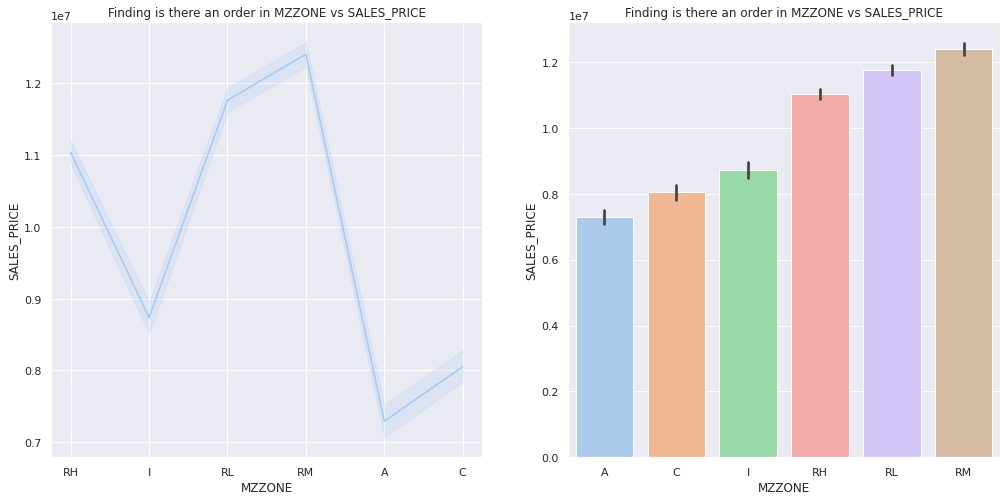

In [72]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['MZZONE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.show()

**In above all the graphs there is an linear trend. For Encoding this categorical variable we use Label Encoding.**

## **REALTION WITH TARGET VARIABLE.**

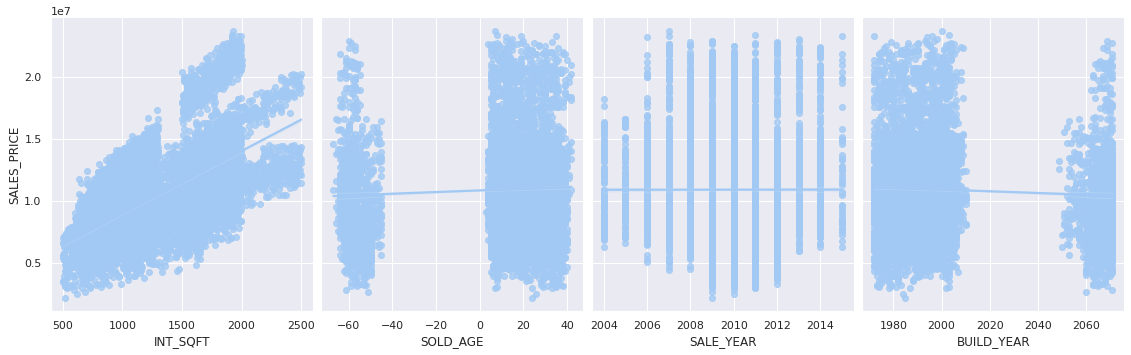

In [73]:
sns.pairplot(df,x_vars=["INT_SQFT", "SOLD_AGE","SALE_YEAR","BUILD_YEAR"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8, kind="reg")
plt.show()

**In above graph i have checked whether if there is a linear relationship with target_variable('SALES_PRICE').Only "INT_SQFT" has the clear linear relation with the target_variable('SALES_PRICE'), others are flatten.**

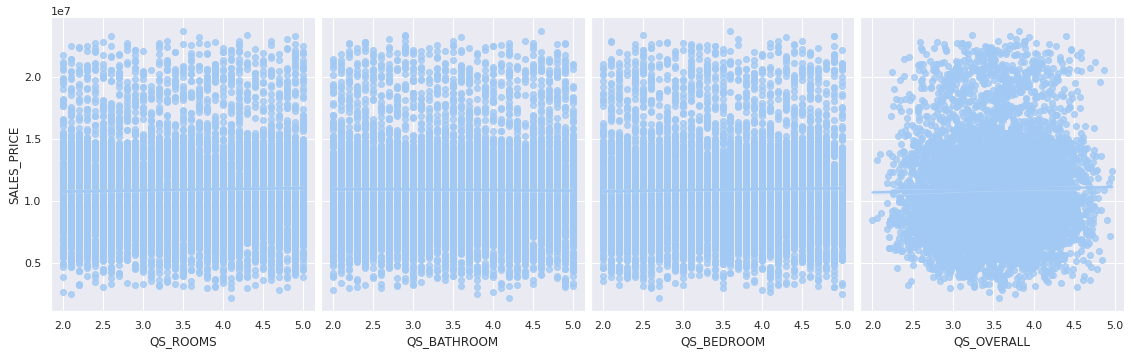

In [74]:
sns.pairplot(df,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

In above graph i have checked other few features has a linear relationship with target_variable('SALES_PRICE'). No features has the linear relationship with the target_variable('SALES_PRICE').

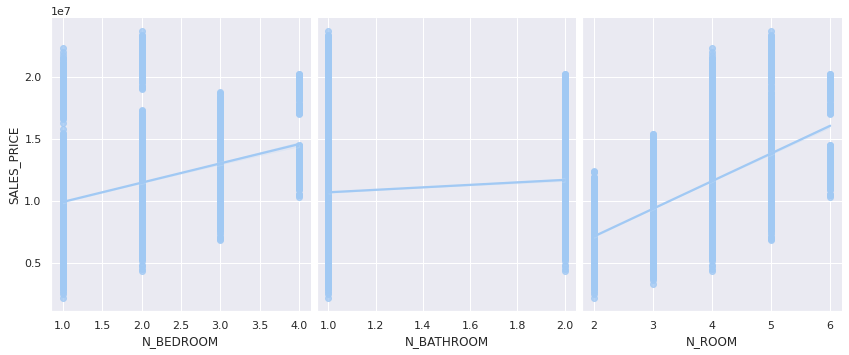

In [75]:
sns.pairplot(df,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

In above graph i have checked other few features has a linear relationship with target_variable('SALES_PRICE'). ["N_ROOMS","N_BEDROOM"] has the linear relationship with the target_variable(SALES_PRICE). But "N_BATHROOM" has no linear relationship with the target_variable('SALES_PRICE').

In [76]:

#BUILDTYPE WISE MIN.AVG.MAX Sales_Prices:-

buildtype_fltr_C = df['BUILDTYPE']=='Commercial'
commercial=df.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
mean= commercial['SALES_PRICE'].mean()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

buildtype_fltr_H = df['BUILDTYPE']=='House'
House=df.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

buildtype_fltr_O = df['BUILDTYPE']=='Others'
Others=df.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Build_type_mmm = pd.concat([comm,house,others],axis=1)
Build_type_mmm = pd.DataFrame(Build_type_mmm.T)
Build_type_mmm["Build_type"]=["Commercial","House","Others"]

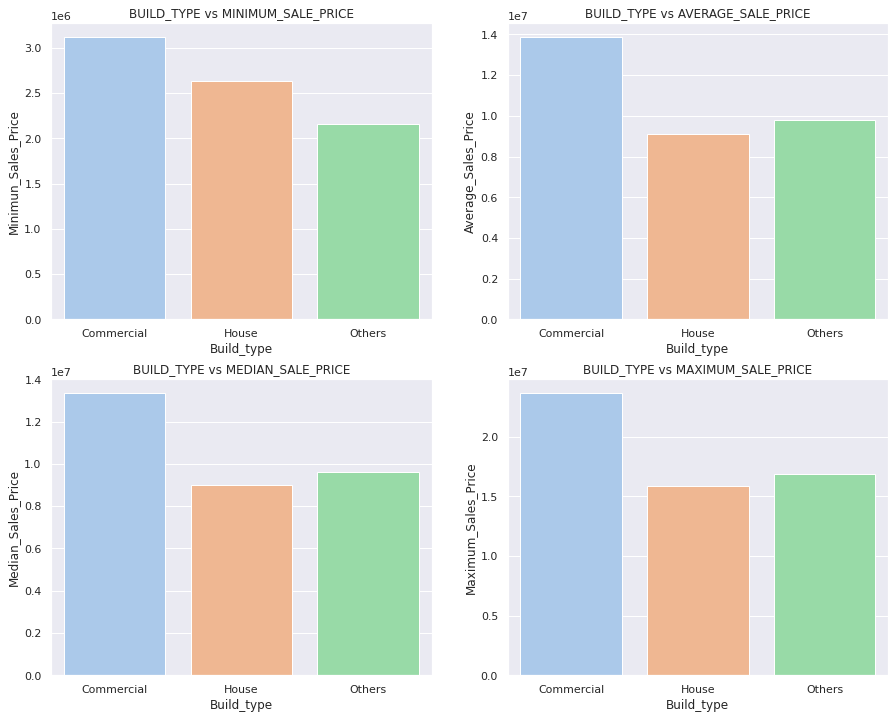

In [77]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Average_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()



1.   **COMMERCIAL** - In all graphs, the Minimum,Average,Median and Maximum Price of commercial building is higher than "House" and "Others" building type.

2.  **House**      - Minimum price of "House" price is higher than "Others" building type, but Maximum,Average and Median Price lower than "Others" building type

3.   **Others**     - Minimum price of "Others" price is lower than "House" building type, but Maximum,Average and Median Price higher than "House" building type.



In [78]:

#AREA WISE MIN.AVG.MAX Sales_Prices:-

mean=df.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=df.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=df.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=df.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

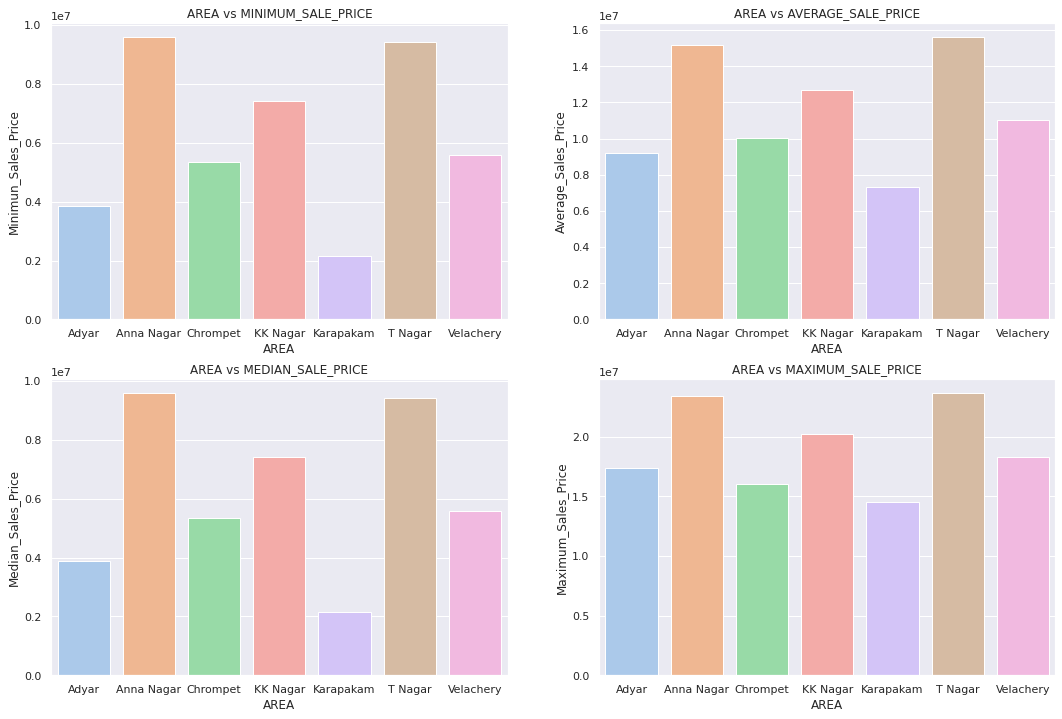

In [79]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

In [80]:
mean=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

In [81]:
mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]   

### **RESPECTIVE WITH MINIMUM PRICE OF EACH AREA**



1.   **COMMERCIAL** - **(LOW - HIGH)**- Karapakkam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".
2.   **HOUSE** - **(LOW - HIGH**) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".
3.    **OTHERS** - **(LOW - HIGH)** - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".



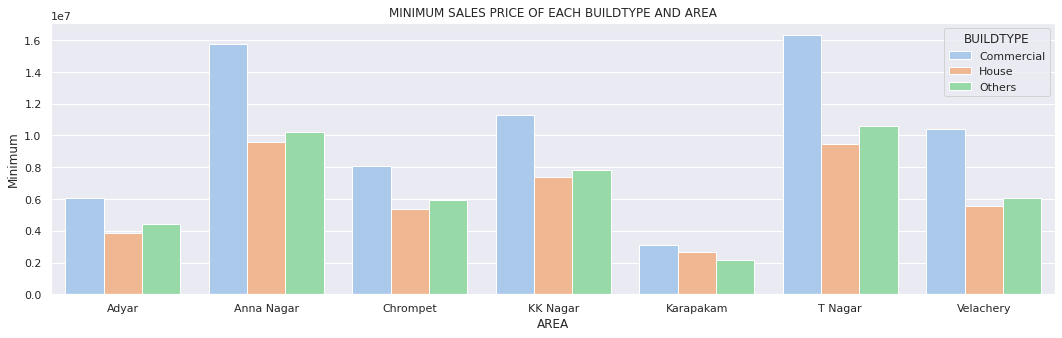

In [82]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

### **- RESPECTIVE WITH AVERAGE PRICE OF EACH AREA.**



*   **COMMERCIAL** - (LOW - HIGH) - Karapakkam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".

*   **HOUSE** - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar""Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

*    **OTHERS** - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".







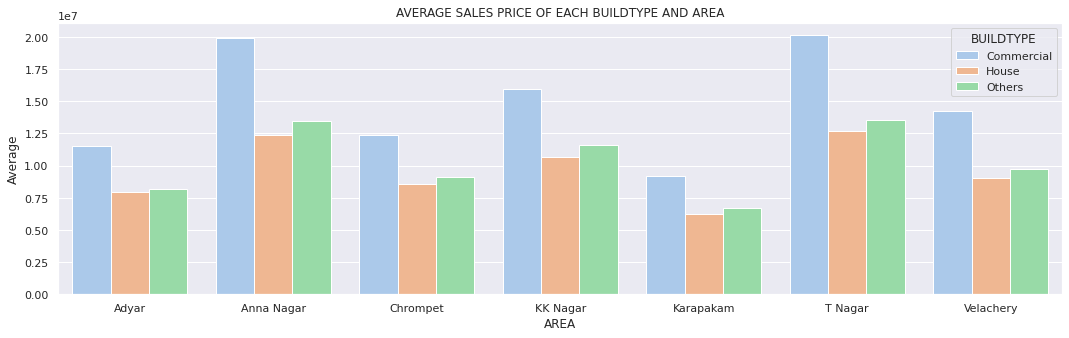

In [83]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

### **RESPECTIVE WITH MAXIMUM PRICE OF EACH AREA**



1.   **COMMERCIAL** - (LOW - HIGH) - Karapakkam area has the lowest price when compared with other area's. Followed with ["Chrompet","Adyar","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".

2.   **HOUSE** - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar""Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

3.   **OTHERS** - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".



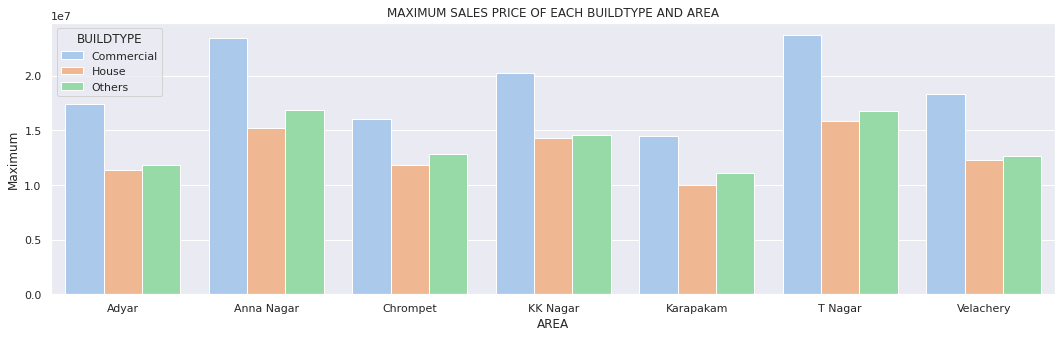

In [84]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

### **ENCODING THE CATEGORICAL FEATURES.**

In [85]:
df.head()

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,Anna Nagar,1986,2006,2.0,1.0,5,Abnormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,40676975.91,11
1,Velachery,1855,2010,3.0,2.0,5,Family,No,1988,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,9630290,15418404.56,22
2,Chromepet,1220,2014,2.0,1.0,4,Partial,No,2009,Commercial,NoSewer,No Access,RH,4.5,2.6,3.1,3.320,12394750,16963071.24,5
3,Chromepet,1167,2007,1.0,1.0,3,Partial,No,1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670,8488790,15287831.22,28
4,Velachery,1847,2006,3.0,2.0,5,Family,No,1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,16800250,31466553.17,10


In [86]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,float64,int64
0,7,7,6


In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

In [88]:
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df['AREA']=le.fit_transform(df['AREA'])
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['SALE_COND']=le.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])

In [89]:
df.head()

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,1,1986,2006,2.0,1.0,5,0,0,1995,0,0,0,3,4.9,4.2,2.5,3.765,21717770,40676975.91,11
1,6,1855,2010,3.0,2.0,5,2,0,1988,2,2,2,2,4.7,3.9,3.6,4.010,9630290,15418404.56,22
2,2,1220,2014,2.0,1.0,4,4,0,2009,0,2,1,3,4.5,2.6,3.1,3.320,12394750,16963071.24,5
3,2,1167,2007,1.0,1.0,3,4,0,1979,2,0,1,4,3.6,2.1,2.5,2.670,8488790,15287831.22,28
4,6,1847,2006,3.0,2.0,5,2,0,1996,0,0,0,5,2.4,4.5,2.1,3.260,16800250,31466553.17,10


### **FEATURE IMPORTANCE.**

### **CORRELATION WITHIN THE FEATURES.**

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr

In [91]:
X=df.drop(['SALES_PRICE','INF_PRICE'],axis=1)
y=df['SALES_PRICE']

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 18), (1422, 18), (5687,), (1422,))

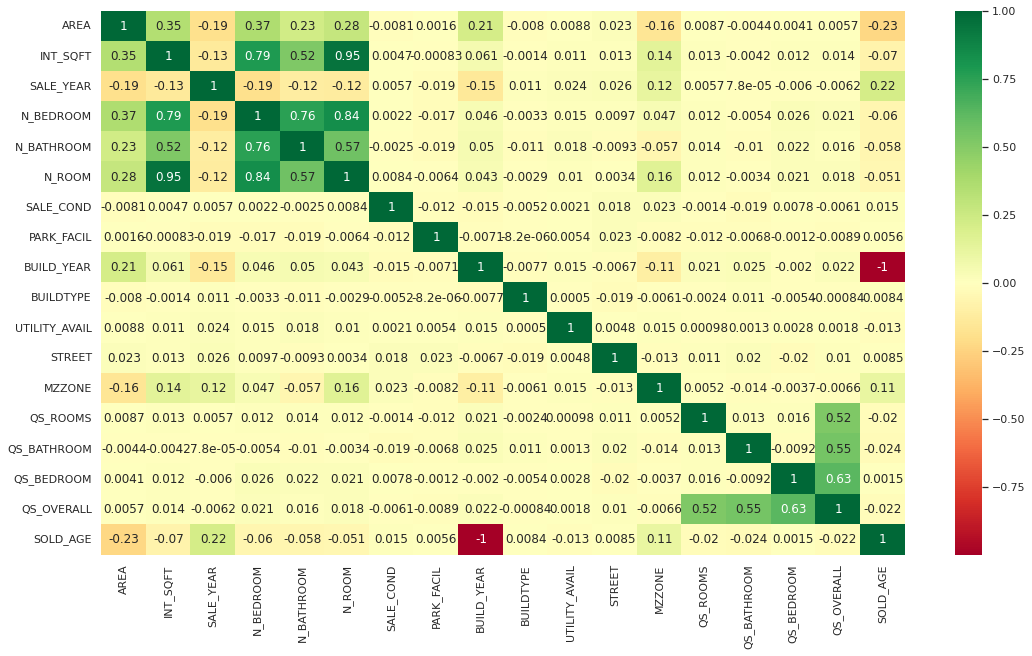

In [93]:
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

In [94]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [95]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))
print('This column are highly correlated with another column:',corr_features)

This column are highly correlated with another column: {'N_ROOM', 'SOLD_AGE'}


In [96]:
cwf_train=X_train.drop(corr_features,axis=1)
cwf_test=X_test.drop(corr_features,axis=1)

In [97]:
# y_train.shape
cwf_train.shape

(5687, 16)

In [98]:
train = pd.concat([cwf_train,y_train],axis=1)
test = pd.concat([cwf_test,y_test],axis=1)

In [99]:
new_df=pd.concat([train,test],axis=0)
new_df.shape
print("PREVIOUSLY THE NO. OF FEATURE IS:",df.shape)
print("NOW THE NO. OF FEATURE IS:",new_df.shape)
print("{} FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE".format(df.shape[1]-new_df.shape[1]))

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 20)
NOW THE NO. OF FEATURE IS: (7109, 17)
3 FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE


### **CORRELATION WITH TARGET VARIABLE.**

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
SALES_PRICE,-0.019138,0.612125,0.000906,0.330987,0.108834,-0.030732,0.146428,-0.053849,-0.436276,-0.023812,-0.042652,0.427789,0.021967,-0.011377,0.018804,0.020485,1.0


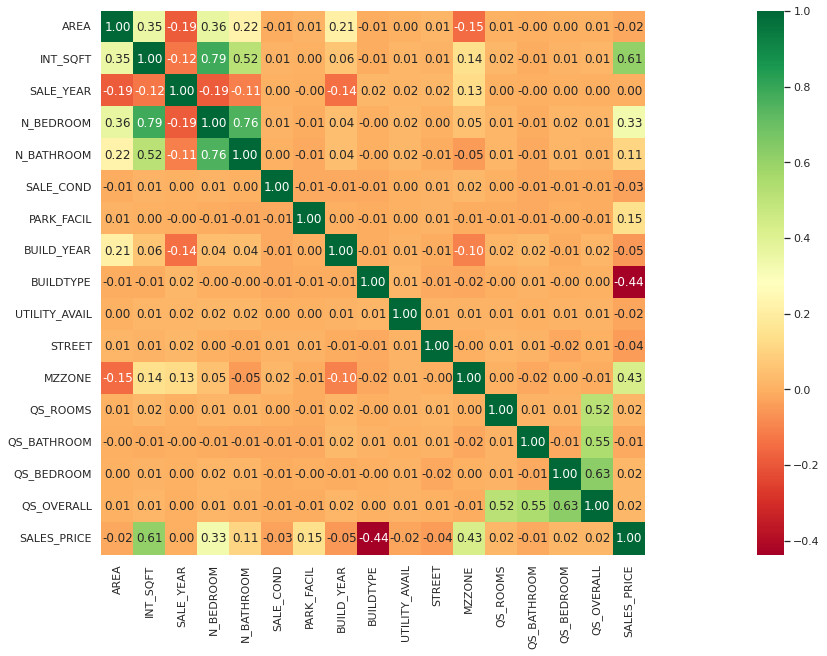

In [100]:
#correlation matrix
corrmat = new_df.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(new_df[new_df.columns[:]].corr()['SALES_PRICE'][:]).T
i=i.iloc[0]
pd.DataFrame(i).T

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
scaler=StandardScaler()
minmax=MinMaxScaler()

In [102]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

In [104]:
best_features_X = SelectKBest(score_func=f_regression,k=10).fit_transform(X,y)
# print(best_features_X.scores_)

In [105]:
correlation_list=[]
for column in X.columns:
  corr_list=pearsonr(X[column],y)
  correlation_list.append([column,corr_list[0],corr_list[1]])

In [106]:
corr_df=pd.DataFrame(correlation_list,columns=['Features','Correlation','P-Value'])
corr_df.sort_values(by='P-Value',inplace=True)
corr_df.T

,1,8,11,3,6,4,7,10,5,9,12,15,0,14,13,2
Features,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,N_BATHROOM,BUILD_YEAR,STREET,SALE_COND,UTILITY_AVAIL,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,QS_BATHROOM,SALE_YEAR
Correlation,0.612125,-0.436276,0.427789,0.330987,0.146428,0.108834,-0.053849,-0.042652,-0.030732,-0.023812,0.021967,0.020485,-0.019138,0.018804,-0.011377,0.000906
P-Value,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.000322,0.00956,0.044681,0.064015,0.084155,0.106634,0.112895,0.337486,0.939123


In [107]:
model_training_feature1 = corr_df['Features']
model_training_feature1 = model_training_feature1.to_list()
model_training_feature = corr_df['Features']
model_training_feature = model_training_feature.to_list()
model_training_feature

['INT_SQFT',
 'BUILDTYPE',
 'MZZONE',
 'N_BEDROOM',
 'PARK_FACIL',
 'N_BATHROOM',
 'BUILD_YEAR',
 'STREET',
 'SALE_COND',
 'UTILITY_AVAIL',
 'QS_ROOMS',
 'QS_OVERALL',
 'AREA',
 'QS_BEDROOM',
 'QS_BATHROOM',
 'SALE_YEAR']

In [108]:
new_df = pd.DataFrame(new_df,columns=model_training_feature)
new_df=pd.concat([new_df,df['SALES_PRICE']],axis=1)

In [109]:
new_df.head(2)

,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,N_BATHROOM,BUILD_YEAR,STREET,SALE_COND,UTILITY_AVAIL,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,QS_BATHROOM,SALE_YEAR,SALES_PRICE
0,1986,0,3,2.0,0,1.0,1995,0,0,0,4.9,3.765,1,2.5,4.2,2006,21717770
1,1855,2,2,3.0,0,2.0,1988,2,2,2,4.7,4.010,6,3.6,3.9,2010,9630290


### **VARIANCE INFLATION FACTOR.**

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

In [110]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

**This measures the multi-colinearity. If it is more than 5, then we should investigate our features.**



*   **Multicollinearity** - is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. ... In general, multicollinearity can lead to wider confidence intervals that produce less reliable probabilities in terms of the effect of independent variables in a model.










In [112]:
#if VIF is more than 4 then we have change the feature. 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
r2=lr_model.score(X_train,y_train)
vif=1/(1-r2)
vif

4.472539611320635

## **MACHINE LEARNING MODEL:**

In [113]:
df=new_df


In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
scaler=StandardScaler()
minmax=MinMaxScaler()

In [115]:
X=new_df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

In [117]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **WITH CROSS VALIDATION.**

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

In [120]:
CV_Linear_regression = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.7748627069452915


In [121]:
CV_XG_Boost = cross_val_score(xg_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[08:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [122]:
CV_RandomForest = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_RandomForest)

The cross_validation score of an XG_Boost model is: 0.7941681234753671


In [123]:
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)
print("The cross_validation score of an Random_Forest model is:",CV_RandomForest)

The cross_validation score of an Linear_Regression model is: 0.7748627069452915
The cross_validation score of an XG_Boost model is: 0.9988678484847305
The cross_validation score of an Random_Forest model is: 0.7941681234753671


**R_SQUARED_SCORES**.

1.   **The cross_validation score of an Linear_Regression model is : 0.7770987851132124**
2.   **The cross_validation score of an XG_Boost model is : 0.9988690787850739**
 
3.   **The cross_validation score of an Random_Forest model is : 0.7925536232237124**




### **WITHOUT CROSS_VALIDATION.**

### **LINEAR REGRESSION**

In [124]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [125]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [126]:
lr_y_pred=lr_model.predict(X_test)

In [127]:
print(r2_score(y_test,lr_y_pred))

0.7824413471386451


### **XGBOOST**

In [128]:
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 

In [129]:
xg_model.fit(X_train_scaled,y_train)

[08:54:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=10000)

In [130]:
xg_y_pred=xg_model.predict(X_test_scaled)

In [131]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

XGBoost model Rsquared metric: 0.9990960838270426


### **RANDOM FOREST**

In [132]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)

In [133]:
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.7934181263516362


### **ENSEMBLE TECHNIQUE**

In [134]:
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)
# model4 = xg.XGBRegressor(random_state=1) 
# # we need to give the list of models that we are trying to combine
# model.fit(x_train,y_train) # to train all of the models
# preds = model.predict(x_test)
# model.score(x_test,y_test) # prediction

# model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree',model4)])
model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3)])
model.fit(X_train,y_train)
et_y_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.960645073764352


### **R_SQUARED_SCORES.**



*   The cross_validation score of an Linear_Regression model is : 0.7846207107682147
*   The cross_validation score of an XG_Boost model is : 0.9991105715153005
*   The cross_validation score of an Random_Forest model is : 0.7923506517314066
*   The cross_validation score of an Ensemble_technic model is : 0.9619503418611233



### **BEST MODEL**

*   My XGBoost model give me the high accuracy which is close to 1
*   Followed by Ensemble Technique, RandomForest Regressor and Linear         Regression.



In [135]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))
print("Ensemble Technique Rsquared metric:",r2_score(y_test,et_y_pred))
print("Random forest Regressor model Rsquared metric:",r2_score(y_test,rf_pred))
print("Linear Regg model Rsquared metric:",r2_score(y_test,lr_y_pred))

XGBoost model Rsquared metric: 0.9990960838270426
Ensemble Technique Rsquared metric: 0.960645073764352
Random forest Regressor model Rsquared metric: 0.7934181263516362
Linear Regg model Rsquared metric: 0.7824413471386451


### **SUGGESTION TO BUYERS AND REAL ESTATE AGENTS**

### **ANSWER TO REAL ESTATE AGENT**



*   If any agent want to build any type of building in chennai. I would suggest him to build a "Commercial" building. When it comes to the location I would suggest him "T Nagar", as the first choice because the 'average/minimum/maximum sales_price' of "T Nagar" is higher than other Area. I would suggest the agent to build with the "Parking facility" and with "All_Utility" . Gravel type street fetches more money than Paved street. I will strongly suggest not to construct any type of building which has no access to the building.



### **QUESTIONS TO BUYERS**

*   Before answering them. I would like to ask them whether they have any expections/wishes regarding the build type,location, price,...utility?
*   **ANSWER OF BUYERS**
*   He wants to buy a "HOUSE" building with all amenities
*   **ANSWER TO BUYERS**
*   I would let him know that the average sales_price of "house" building is lesser than "Others" & "Commercial" type buildings. When it comes to the location i would suggest my buyer to buy in Karapakam, because the price of price and also it is near to the beach.
*   **Minmum price = 26,40,250.00**
*   **Average price = 62,66,439.00**
*   **Maximum price** = 99,66,750.00 The Maximum price of "House" building in karapakkam is 9966750.00(Ninty nine lakhs sixty six thousand seven fifty) and the average price is 62,66,439.00(sixty two lakhs sixty six thousand four hundred and thirty nine). Since the buyer need with all amenity, he/she can negotiate the price between (90,00,000 - 95,00,000)

